In [126]:
from sklearn import metrics
import importlib

import pandas as pd
import numpy as np
import tocdata 

import matplotlib.pyplot as plt

#Loading training data,  
dataY=pd.read_csv('data/Morelia_train_Y.csv')
dataX=pd.read_csv('data/Morelia_train_X.csv')

dataYv=pd.read_csv('data/Morelia_validation_Y.csv')
dataXv=pd.read_csv('data/Morelia_validation_X.csv')

#Selecting a feature and class labels

#
#Index(['ixs', 'lat', 'lon', 'pendiente', 'dist_anps', 'dist_agua',
#       'dist_vegetacion', 'dist_urbano', 'dist_centro', 'dist_carreteras',
#       'costo'],
#      dtype='object')


In [3]:
import importlib
import tocplus as otoc

importlib.reload(otoc)

<module 'tocplus' from '/Users/rodrigo/SourcesCodes/sphinx-tovsvtoc/src/tocplus.py'>

len(X)

In [10]:
import numpy as np

len(X)

None


IndexError: index -4999 is out of bounds for axis 0 with size 17

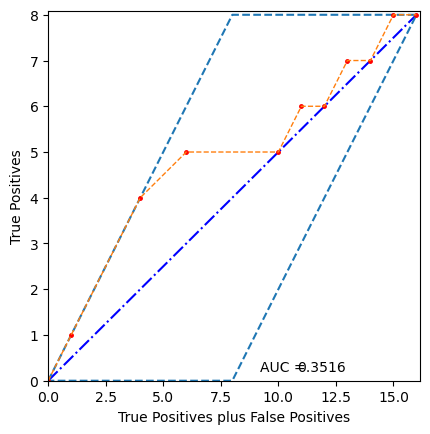

In [12]:
X = np.array([0,1,1,1,2,2,3,3,3,3,4,5,6,7,8,9])
Y = np.array([1,1,1,1,0,1,0,0,0,0,1,0,1,0,1,0])

T1 = otoc.TOC(rank = X, groundtruth = Y)
T1.plot(filename='')


## Plots for TOC for the 2000-2018 period and 2018-2021 period

variable: pendiente
TOC of 2000-2018
None


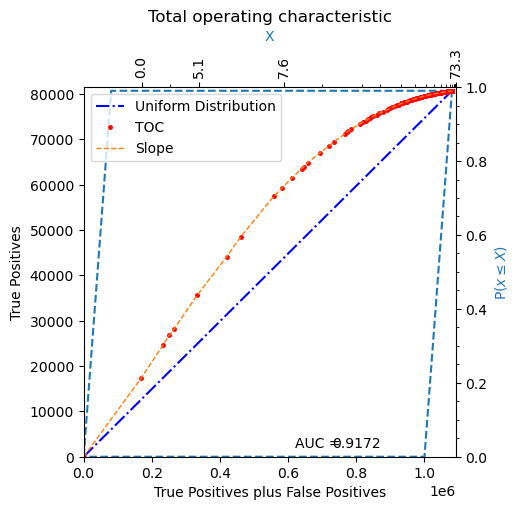

<Figure size 640x480 with 0 Axes>

In [130]:


label = dataY.incremento_urbano.to_numpy()
labelv = dataYv.incremento_urbano.to_numpy()

A = list([])
B = list([])
TOCS = list([])
for c in dataX.columns[3:4]:
    print("variable:", c)
    feature = dataX[c].to_numpy()
    featurev = dataXv[c].to_numpy()

    T1 = otoc.TOC(rank = feature, groundtruth = label)
    TOCS.append(T1)

    print("TOC of 2000-2018")
    T1.plot(filename='')


    
    plt.show()
    

ValueError: x and y must be the same size

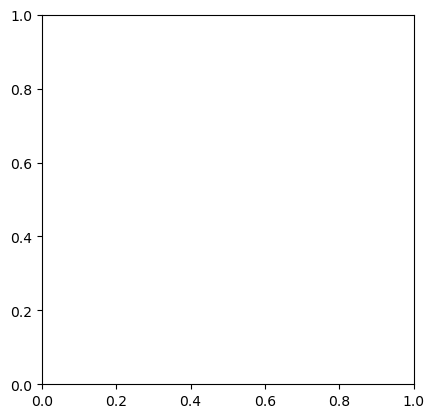

In [128]:
plt.figure(figsize=(4.8, 4.8))
M = T1.generateMassFunction_secant(X, Y, h = 5000*2)
X = T1.TPplusFP[~T1.idiscontinuous]
plt.scatter(X,M)
plt.axhline(y =  Y[-1]/X[-1], color='r', linestyle = "--")




In [129]:
T1.plotHistograms()

TypeError: plotHistograms() takes 0 positional arguments but 1 was given

In [36]:
len(X)

411250

In [83]:
print(len(np.array(M)[~T1.idiscontinuous]))
print(len(M))

411250
1080835


/var/folders/k9/wpfgnz550_n_k3t9tg8scnlw0000gn/T/ipykernel_63682/4208032041.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(T1.thresholds[~T1.idiscontinuous], np.array(M)[~T1.idiscontinuous], marker,markersize = 1.0, color = "tab:blue", label = "frequency of positive labels")


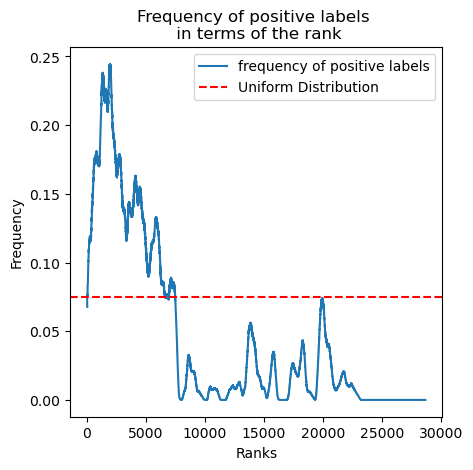

/var/folders/k9/wpfgnz550_n_k3t9tg8scnlw0000gn/T/ipykernel_63682/1409695665.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(T1.ndata)[~T1.idiscontinuous], np.array(M)[~T1.idiscontinuous], marker,markersize = 1.0, color = "tab:blue", label = "Frquency of positive labels")


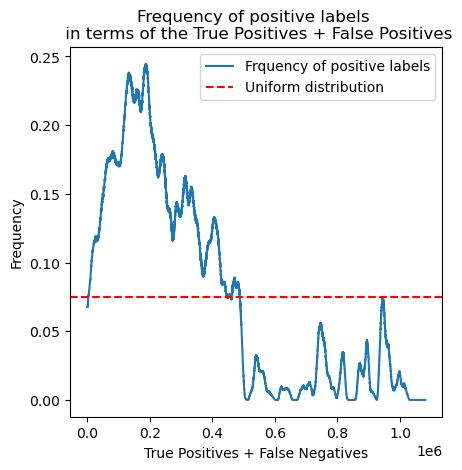

In [112]:
fig, ax1 = plt.subplots(1, 1, figsize = (4.8 , 4.8))
marker='-r'  
plt.plot(np.arange(T1.ndata)[~T1.idiscontinuous], np.array(M)[~T1.idiscontinuous], marker,markersize = 1.0, color = "tab:blue", label = "Frquency of positive labels")
plt.axhline(y =  Y[-1]/X[-1], color='r', linestyle = "--", label = "Uniform distribution")
plt.xlabel("True Positives + False Negatives")
plt.ylabel("Frequency")
plt.title("Frequency of positive labels \n in terms of the True Positives + False Positives")
plt.legend()


/var/folders/k9/wpfgnz550_n_k3t9tg8scnlw0000gn/T/ipykernel_63682/3346289021.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(T1.thresholds[~T1.idiscontinuous], np.array(M)[~T1.idiscontinuous], marker,markersize = 1.0, color = "tab:blue", label = "frequency of positive labels")
/var/folders/k9/wpfgnz550_n_k3t9tg8scnlw0000gn/T/ipykernel_63682/3346289021.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  ax[1].plot(np.arange(T1.ndata)[~T1.idiscontinuous], np.array(M)[~T1.idiscontinuous], marker,markersize = 1.0, color = "tab:blue", label = "Frquency of positive labels")


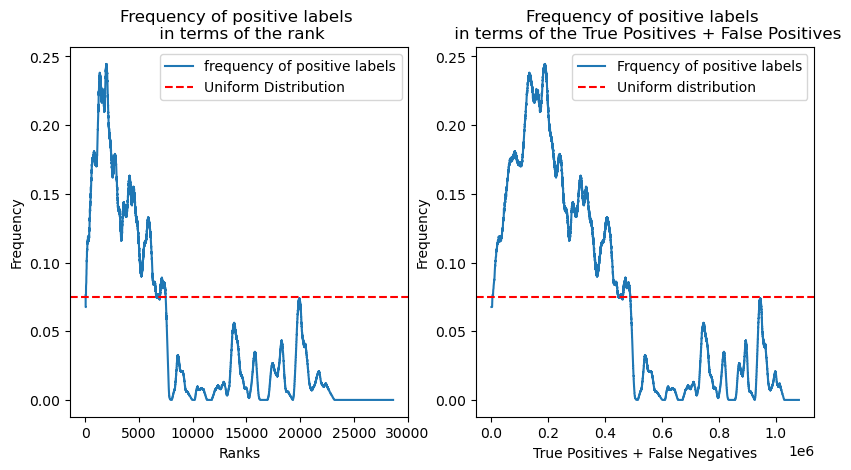

In [119]:
        fig, ax = plt.subplots(1, 2, figsize = (4.8*2 , 4.8))
     
            
        marker='-r'  
        ax[0].plot(T1.thresholds[~T1.idiscontinuous], np.array(M)[~T1.idiscontinuous], marker,markersize = 1.0, color = "tab:blue", label = "frequency of positive labels")
        ax[0].axhline(y =  Y[-1]/X[-1], color='r', linestyle = "--", label="Uniform Distribution")
        ax[0].set_xlabel("Ranks")
        ax[0].set_ylabel("Frequency")
        ax[0].set_title("Frequency of positive labels \n in terms of the rank")
        ax[0].legend()


        ax[1].plot(np.arange(T1.ndata)[~T1.idiscontinuous], np.array(M)[~T1.idiscontinuous], marker,markersize = 1.0, color = "tab:blue", label = "Frquency of positive labels")
        ax[1].axhline(y =  Y[-1]/X[-1], color='r', linestyle = "--", label = "Uniform distribution")
        ax[1].set_xlabel("True Positives + False Negatives")
        ax[1].set_ylabel("Frequency")
        ax[1].set_title("Frequency of positive labels \n in terms of the True Positives + False Positives")
        ax[1].legend()


T1.thresholds[~T1.idiscontinuous][1:]

TypeError: only integer scalar arrays can be converted to a scalar index

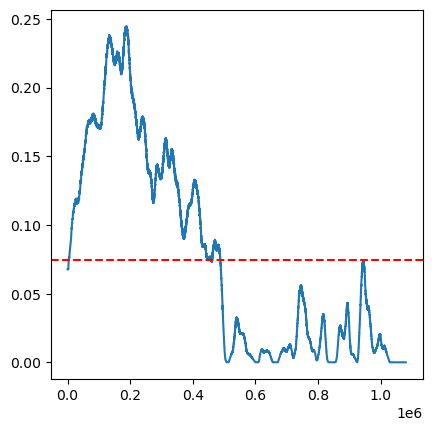

<Figure size 480x480 with 0 Axes>

In [74]:
    
    X = T1.TPplusFP[~T1.idiscontinuous]
    Y = T1.TP[~T1.idiscontinuous]
    M = T1.generateMassFunction_secant(X, Y, h = 5000*2)
    
    plt.figure(figsize=(4.8, 4.8))
    plt.plot(M)
    plt.axhline(y =  Y[-1]/X[-1], color='r', linestyle = "--")
    
   
    
     
    DM = T1.generateMassFunction_secant(np.arange(len(M)), M, h = 5000*2*2*2*2)
    plt.figure(figsize=(4.8, 4.8))
    plt.plot(T1.thresholds[~T1.idiscontinuous][1:], DM[T1.idiscontinuous][1:])
    plt.axhline(y = 0, color = "tab:red", linestyle = "--")
    plt.title("Atractiveness analysis")

variable: pendiente
TOC of 2018-2021
None


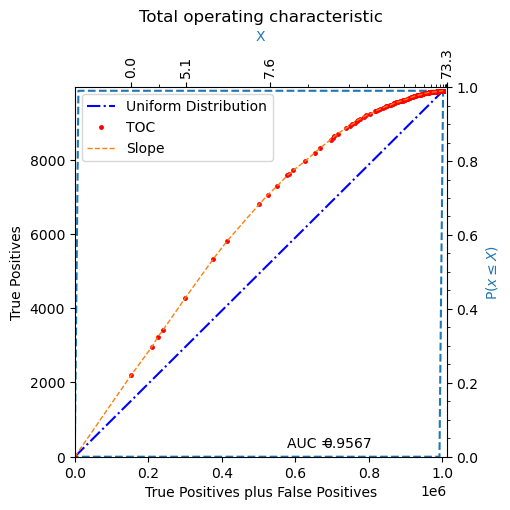

<Figure size 640x480 with 0 Axes>

In [7]:


label = dataY.incremento_urbano.to_numpy()
labelv = dataYv.incremento_urbano.to_numpy()

A = list([])
B = list([])

for c in dataX.columns[3:4]:
    
    print("variable:", c)
    
    feature = dataX[c].to_numpy()
    featurev = dataXv[c].to_numpy()
    
    T1 = otoc.TOC(rank = featurev, groundtruth = labelv)
    
    print("TOC of 2018-2021")
    T1.plot(filename='')



    
    plt.show()
    

Text(0, 0.5, 'TP(x)')

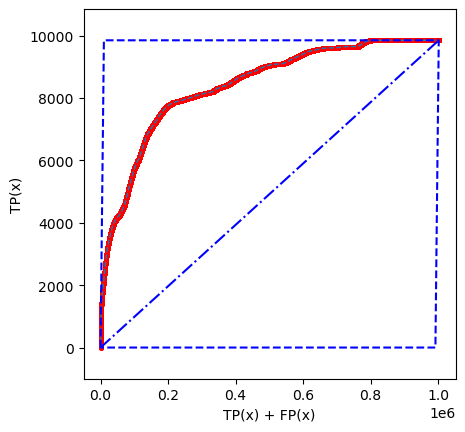

In [6]:
plt.figure(figsize = (4.8, 4.8))

marker='.r'
plt.plot(T1.TPplusFP[~T1.idiscontinuous], T1.TP[~T1.idiscontinuous], marker, markersize = 5.0,
                     label = "CPDF", linewidth = 1)

marker='.r'
plt.plot(T1.TPplusFP[~T1.idiscontinuous], T1.TP[~T1.idiscontinuous], "--", markersize = 5.0,
                     label = "CPDF", linewidth = 1)

rx = np.array([0, T1.npos, T1.ntppfp, T1.ntppfp-T1.npos, 0])
ry = np.array([0, T1.npos, T1.npos, 0, 0])



plt.plot(np.array([0, T1.ntppfp]), np.array([0, T1.npos]),'b-.',
                     label = "Uniform Distribution")

plt.plot(rx, ry, 'b--')

#plt.xlim(-1.0, 1.01*np.max(T1.thresholds[~T1.idiscontinuous][1:]))
plt.ylim(-1000, np.max(ry)+1000)


plt.xlabel("TP(x) + FP(x)")
plt.ylabel("TP(x)")

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam,SGD,RMSprop  
from tensorflow.keras.callbacks import EarlyStopping

#from pytoc import TOC, TOC_painter

from sklearn.neural_network import MLPClassifier

from imblearn.under_sampling import RandomUnderSampler

from sklearn.neural_network import MLPClassifier, MLPRegressor

C = MLPRegressor(hidden_layer_sizes = (500), max_iter = 10000, 
                           activation = 'logistic', solver = 'lbfgs')

In [38]:
inputs = keras.Input(shape=(np.shape(X_train_resampled)[1],), name='input')
x = tf.keras.layers.Dense(150, activation='sigmoid')(inputs)
x = tf.keras.layers.Dense(100, activation='sigmoid')(x)
x = tf.keras.layers.Dense(50, activation='sigmoid')(x)
#x = tf.keras.layers.Dense(2, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 8)

MLP = tf.keras.Model(inputs=inputs, outputs=outputs)

MLP.compile(optimizer = 'adam',
            loss = 'binary_crossentropy',
            #loss = CustomAccuracy(),
            #metrics = 'binary_crossentropy'
            metrics = 'binary_crossentropy'
            )

history_mlp = MLP.fit(X_train_resampled, y_train_resampled, validation_data=(X_test.iloc[:,3:], Y_test.iloc[:,-1]),  callbacks=[callback] , epochs = 250, batch_size = int(len(y_train_resampled)))


NameError: name 'X_train_resampled' is not defined

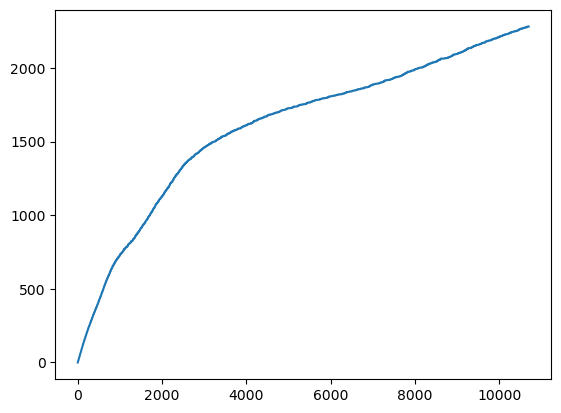

In [32]:
plt.plot(X[:10000], Y[:10000])



In [36]:
M = C.fit(X, Y)

ValueError: Expected 2D array, got 1D array instead:
array=[0.000000e+00 1.000000e+00 2.000000e+00 ... 1.001993e+06 1.001994e+06
 1.001995e+06].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

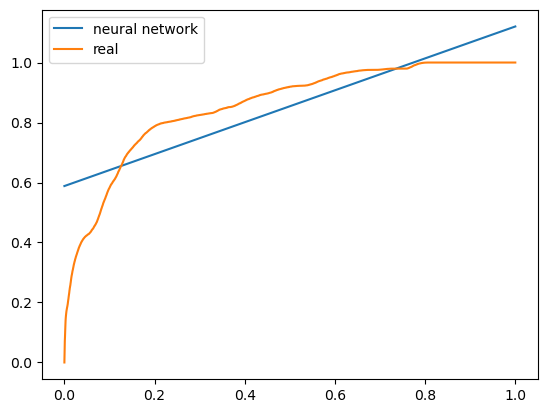

In [180]:
plt.plot((X/np.max(X)), M.predict((X/np.max(X))), label = "neural network")
plt.plot((X/np.max(X)), Y, label = "real")
plt.legend()

In [195]:
Y.reshape(-1,1)

array([[0.00000000e+00],
       [1.01491931e-04],
       [2.02983863e-04],
       ...,
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00]])

NameError: name 'Y' is not defined

In [39]:
X = T1.TPplusFP[~T1.idiscontinuous].reshape(-1, 1)
X = X/np.max(X)

Y = T1.TP[~T1.idiscontinuous]
Y = Y/np.max(Y)

ix = np.arange(len(Y))

np.random.shuffle(ix)

X_train = X[ix][:int(len(ix)*0.7)]
Y_train = Y[ix][:int(len(ix)*0.7)]

X_test = X[ix][int(len(ix)*0.7):]
Y_test = Y[ix][int(len(ix)*0.7):]

In [ ]:
inputs = keras.Input(shape = (np.shape(X_train)[1],), name = 'input')
x = tf.keras.layers.Dense(50, activation='LeakyReLU')(inputs)
x = tf.keras.layers.Dense(50, activation='LeakyReLU')(inputs)
x = tf.keras.layers.Dense(50, activation='LeakyReLU')(inputs)
x = tf.keras.layers.Dense(50, activation='LeakyReLU')(inputs)
x = tf.keras.layers.Dense(50, activation='LeakyReLU')(inputs)
#x = tf.keras.layers.Dense(2, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 100000)

MLP = tf.keras.Model(inputs = inputs, outputs = outputs)

MLP.compile(optimizer = 'sgd',
            loss = 'mean_absolute_error',
            #loss = CustomAccuracy(),
            #metrics = 'binary_crossentropy'
            metrics = 'mean_absolute_error'
            )

history_mlp = MLP.fit(X_train, Y_train, validation_data=(X_test, Y_test),  callbacks=[callback] , epochs = 10000, batch_size = int(len(Y_train)*0.5))

Epoch 1/10000
2/2 [==============================] - 0s 105ms/step - loss: 0.8375 - mean_absolute_error: 0.8375 - val_loss: 0.8009 - val_mean_absolute_error: 0.8009
Epoch 2/10000
2/2 [==============================] - 0s 51ms/step - loss: 0.7946 - mean_absolute_error: 0.7946 - val_loss: 0.7581 - val_mean_absolute_error: 0.7581
Epoch 3/10000
2/2 [==============================] - 0s 46ms/step - loss: 0.7517 - mean_absolute_error: 0.7517 - val_loss: 0.7151 - val_mean_absolute_error: 0.7151
Epoch 4/10000
2/2 [==============================] - 0s 46ms/step - loss: 0.7088 - mean_absolute_error: 0.7088 - val_loss: 0.6721 - val_mean_absolute_error: 0.6721
Epoch 5/10000
2/2 [==============================] - 0s 45ms/step - loss: 0.6658 - mean_absolute_error: 0.6658 - val_loss: 0.6293 - val_mean_absolute_error: 0.6293
Epoch 6/10000
2/2 [==============================] - 0s 51ms/step - loss: 0.6230 - mean_absolute_error: 0.6230 - val_loss: 0.5868 - val_mean_absolute_error: 0.5868
Epoch 7/10000
2

In [1]:
plt.plot(history_mlp.history["loss"], label = "training")
plt.plot(history_mlp.history["val_loss"], label = "validation")
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [311]:
yhat_train_mlp = MLP.predict(X)


29214/29214 [==============================] - 9s 318us/step


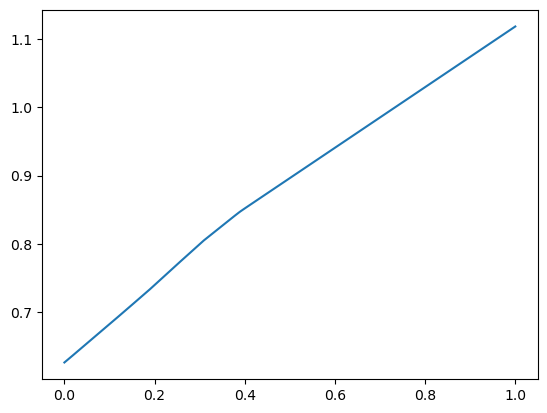

In [312]:
plt.plot(X, yhat_train_mlp)

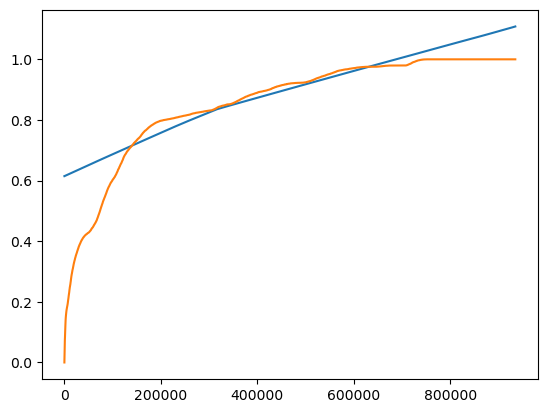

In [305]:
plt.plot(yhat_train_mlp)
plt.plot(Y)

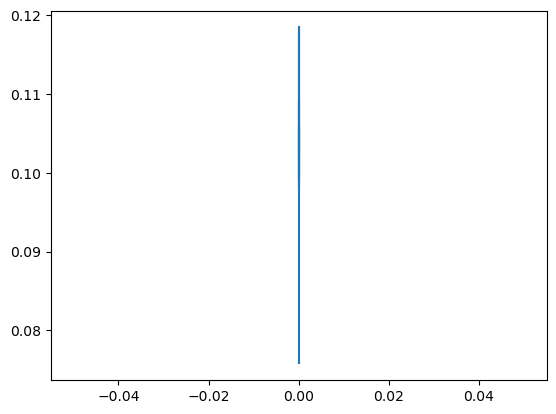

In [35]:
deltaTP = T1.TP[~T1.idiscontinuous][1:]-T1.TP[~T1.idiscontinuous][:-1]
deltaTr = T1.TPplusFP[~T1.idiscontinuous][1:] - T1.TPplusFP[~T1.idiscontinuous][:-1]


plt.plot(T1.thresholds[T1.TP[~T1.idiscontinuous][1:11]],deltaTP[:10]/deltaTr[:10])

(-0.01, 1.01)

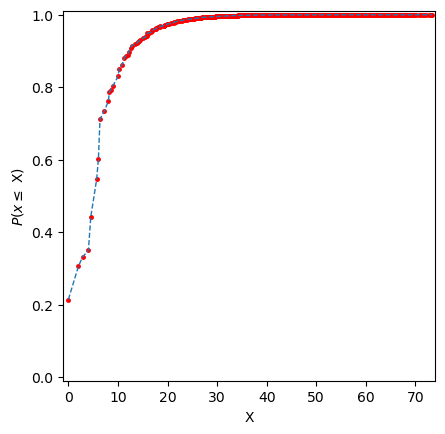

In [37]:
from IPython.display import display, Math, Latex

plt.figure(figsize = (4.8, 4.8))

marker='.r'
plt.plot(T1.thresholds[~T1.idiscontinuous][1:], T1.TP[~T1.idiscontinuous][1:]/np.max(T1.TP[~T1.idiscontinuous][1:]), marker,markersize = 5.0,
                     label = "CPDF", linewidth = 1)

marker='.r'
plt.plot(T1.thresholds[~T1.idiscontinuous][1:], T1.TP[~T1.idiscontinuous][1:]/np.max(T1.TP[~T1.idiscontinuous][1:]), "--", markersize = 5.0,
                     label = "CPDF", linewidth = 1)
plt.xlabel("X")
plt.ylabel(r"$P(x \leq$ X)")
plt.xlim(-1.0, 1.01*np.max(T1.thresholds[~T1.idiscontinuous][1:]))
plt.ylim(-0.01, 1.01)


In [38]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(label, feature)
metrics.auc(fpr, tpr)

0.3704910505080744

In [39]:
np.sum(np.abs(Yinterpv/np.sum(Yinterpv)-Y))

ValueError: operands could not be broadcast together with shapes (1080834,) (674,) 

In [40]:
T = otoc.TOC(rank = -feature, groundtruth = label)
X = T.TPplusFP[~T.idiscontinuous]
Y = T.TP[~T.idiscontinuous]
M = T.generateMassFunction_secant(X, Y, h = 5000)
ix = ~T.idiscontinuous[1:]

In [41]:
Xinterpv = np.linspace(np.min(feature), np.max(feature), len(label))
Yinterpv = np.interp(Xinterpv, -T.rank[T.indices][ix][::-1], np.array(M)[1:][ix][::-1])

variable: pendiente
0.6295089494919257


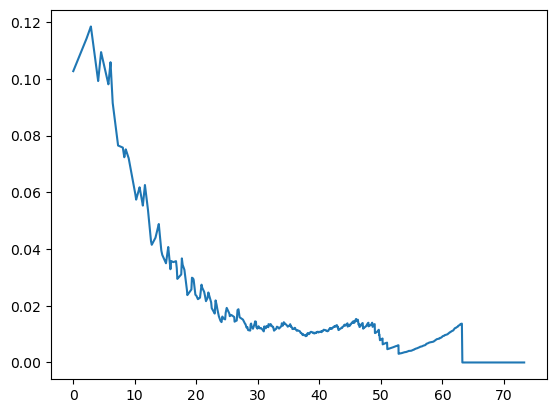

variable: dist_anps
0.7643680090277741


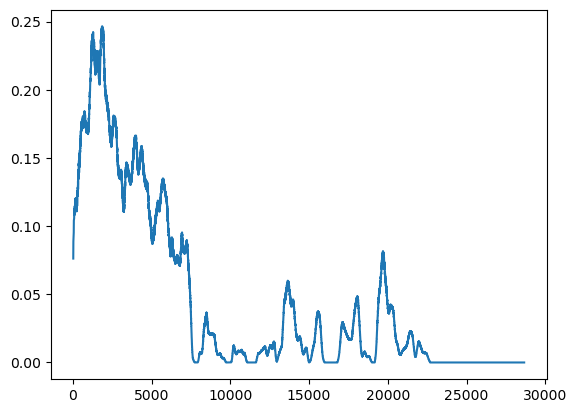

variable: dist_agua
0.41235031465235056


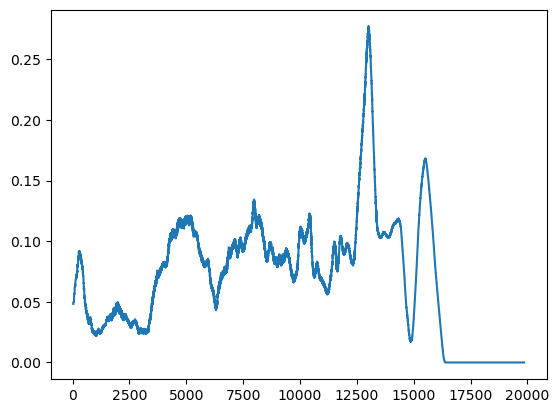

variable: dist_vegetacion
0.33411668199610467


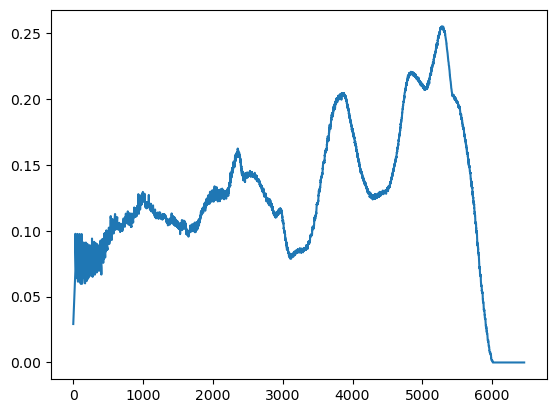

variable: dist_urbano
0.8204344066923678


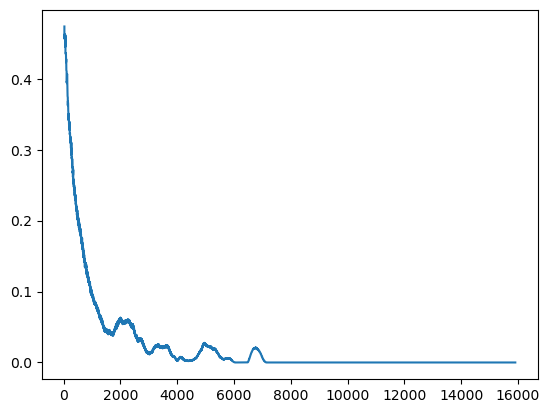

variable: dist_centro
0.8485504996197161


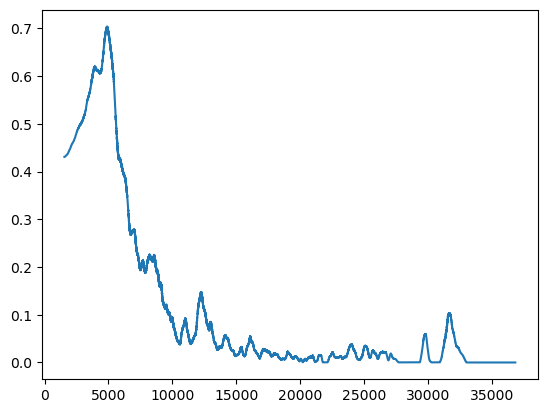

variable: dist_carreteras
0.7713367457572875


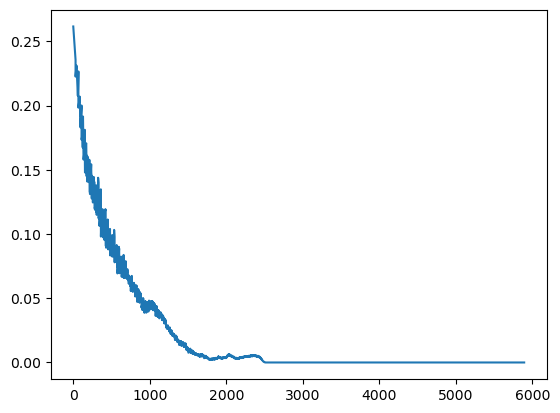

variable: costo
0.9115285446785463


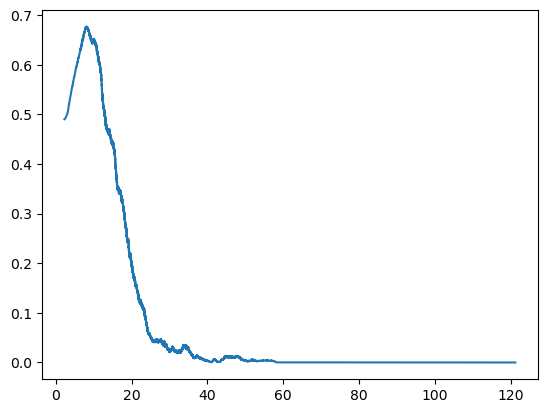

In [173]:
label = dataY.incremento_urbano.to_numpy()
labelv = dataYv.incremento_urbano.to_numpy()

A = list([])
B = list([])

C = list([])
D = list([])

for c in dataX.columns[3:]:
    
    print("variable:", c)
    feature = dataX[c].to_numpy()
    featurev = dataXv[c].to_numpy()
    
    fpr, tpr, thresholds = metrics.roc_curve(label, -feature)
    print(metrics.auc(fpr, tpr))
    A.append(metrics.auc(fpr, tpr))
    
    T = otoc.TOC(rank = -feature, groundtruth = label)
    X = T.TPplusFP[~T.idiscontinuous]
    Y = T.TP[~T.idiscontinuous]
    M = T.generateMassFunction_secant(X, Y, h = 5000)
    
    Y = np.mean(labelv)/np.sum(M)
    ix = ~T.idiscontinuous[1:]
    Xinterpv = np.linspace(np.min(feature), np.max(feature), len(label))
    Yinterpv = np.interp(Xinterpv, -T.rank[T.indices][ix][::-1], np.array(M)[1:][ix][::-1])
   # Yinterpv = np.array(M)[1:][ix][::-1]
    
    #print("-->", np.sum(np.abs(Yinterpv/np.sum(Yinterpv)-Y)))
    B.append(np.sum(np.abs(Yinterpv/np.sum(Yinterpv)-Y)))
    plt.plot(Xinterpv, Yinterpv)
    plt.show()
    
    fpr, tpr, thresholds = metrics.roc_curve(labelv, -featurev)
    C.append(metrics.auc(fpr, tpr))
    
    T = otoc.TOC(rank = -featurev, groundtruth = labelv)
    X = T.TPplusFP[~T.idiscontinuous]
    Y = T.TP[~T.idiscontinuous]
    M = T.generateMassFunction_secant(X, Y, h = 5000)
    
    Y = np.mean(labelv)/np.sum(M)
    ix = ~T.idiscontinuous[1:]
    Xinterpv = np.linspace(np.min(feature), np.max(feature), len(label))
    Yinterpv = np.interp(Xinterpv, -T.rank[T.indices][ix][::-1], np.array(M)[1:][ix][::-1])
    #Yinterpv = np.array(M)[1:][ix][::-1]
    D.append(np.sum(np.abs(Yinterpv/np.sum(Yinterpv)-Y)))
    
    

<BarContainer object of 8 artists>

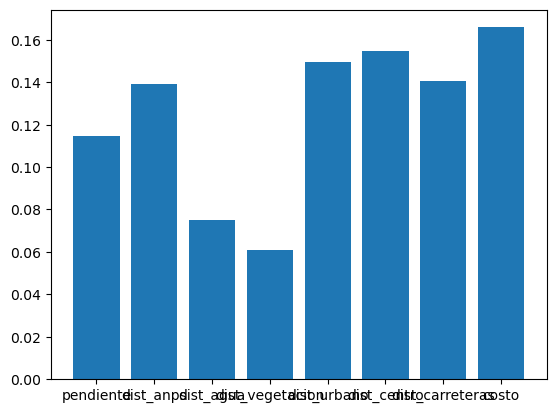

In [127]:
plt.bar(dataX.columns[3:], A/np.sum(A))

<BarContainer object of 8 artists>

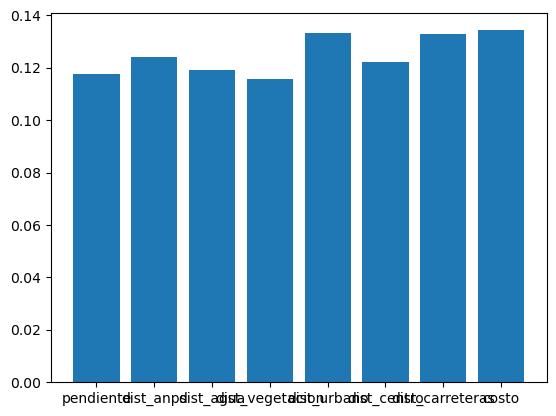

In [121]:
plt.bar(dataX.columns[3:], B)

<BarContainer object of 8 artists>

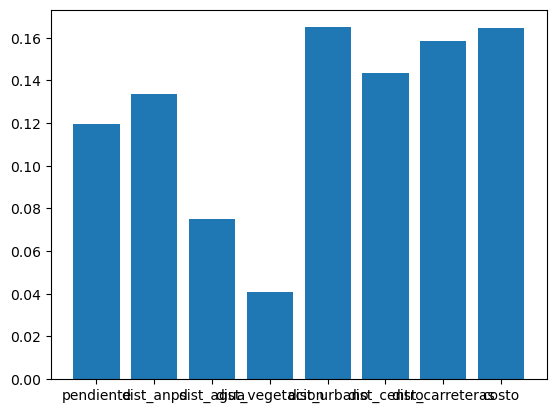

In [125]:
plt.bar(dataX.columns[3:], C/np.sum(C))

<BarContainer object of 8 artists>

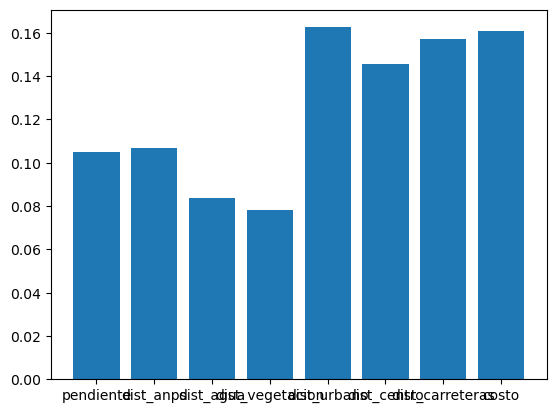

In [124]:
plt.bar(dataX.columns[3:], D/np.sum(D))

In [118]:
plt.bar(len(Yinterpv),Yinterpv)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x163d64550> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x2941c7a60> (for post_execute):


KeyboardInterrupt: 

In [ ]:


feature = dataX[c].to_numpy()
featurev = dataXv[c].to_numpy()

def plotTOC(X, Y):
    
    T = otoc.TOC(rank = -X, groundtruth = Y)
    X = T.TPplusFP[~T.idiscontinuous]
    Y = T.TP[~T.idiscontinuous]
    
    

variable: pendiente


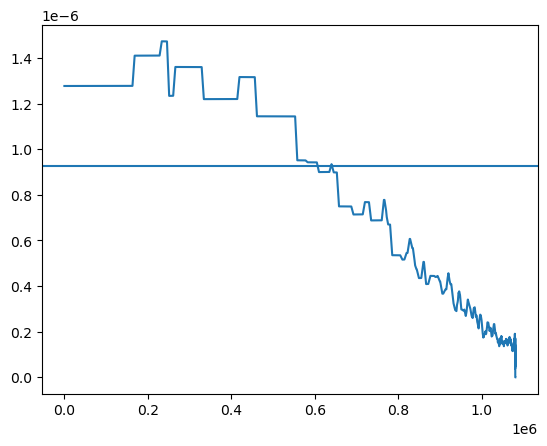

1.0


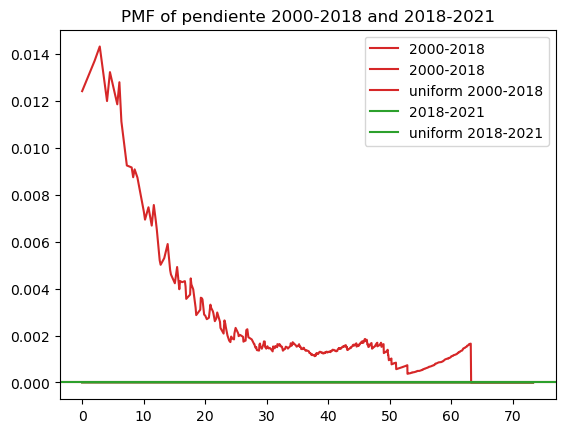

-> 0.9493574439671751
--> 1.1354754864221999
variable: dist_anps


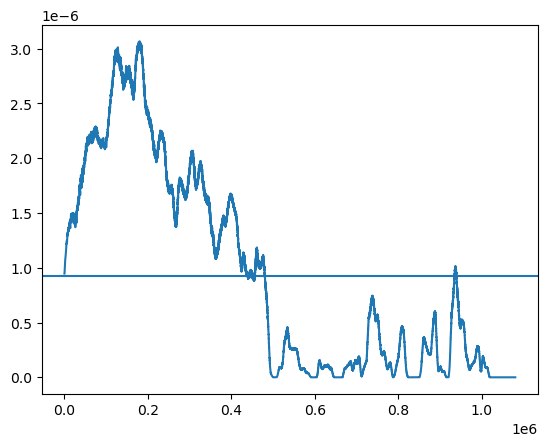

1.0000000000000002


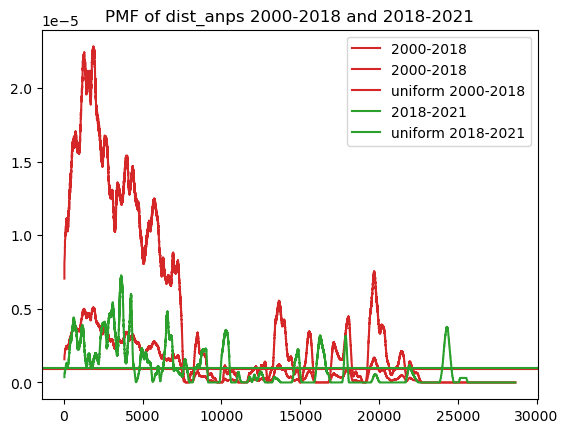

-> 1.1673159239309585
--> 1.1557978735709944
variable: dist_agua


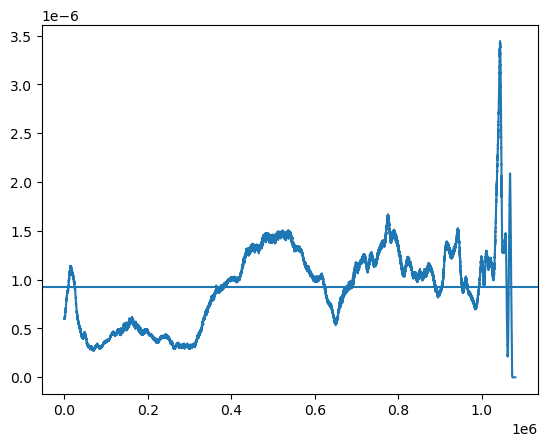

1.0000000000000002


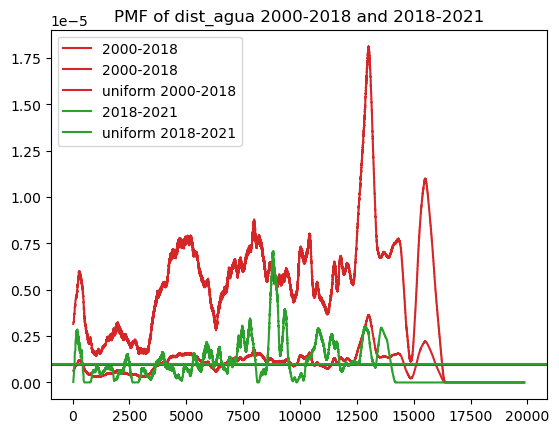

-> 0.5703701636590603
--> 0.9023659516149205
variable: dist_vegetacion


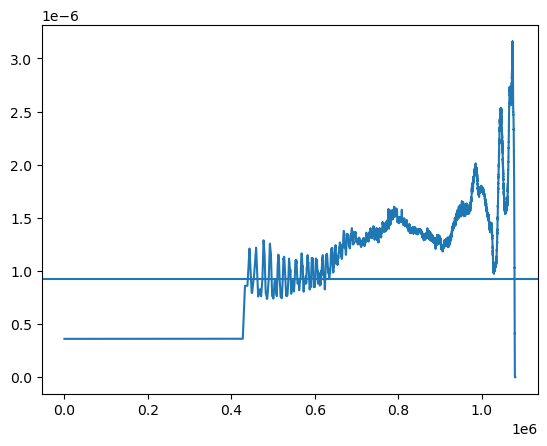

0.9999999999999999


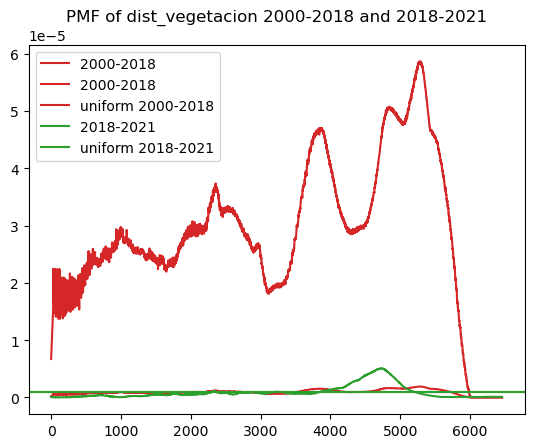

-> 0.3472252078957104
--> 0.8463282314847743
variable: dist_urbano


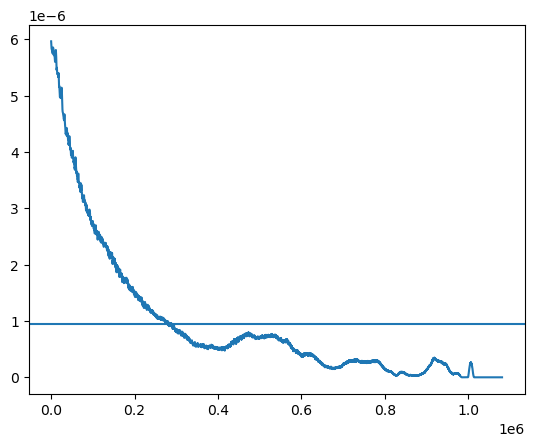

0.9999999999999999


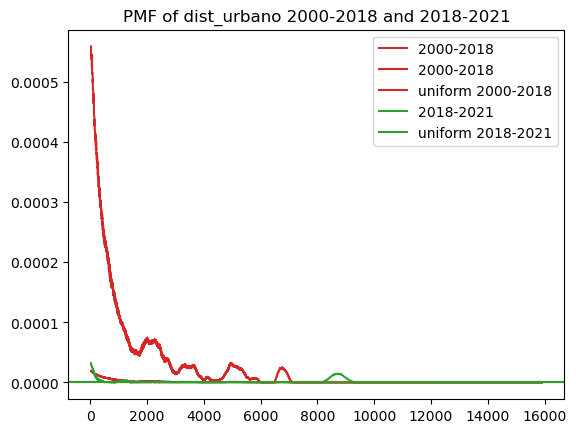

-> 1.4564793539333343
--> 1.7570069863459625
variable: dist_centro


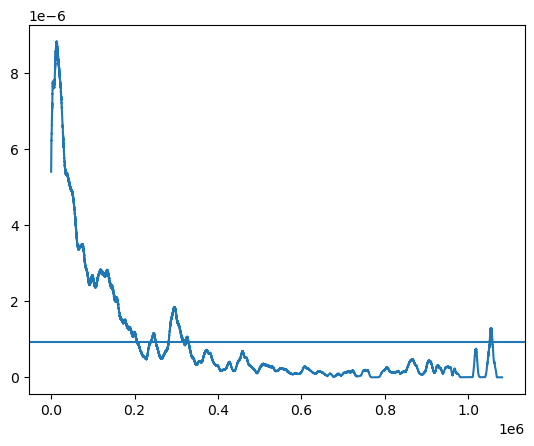

1.0000000000000002


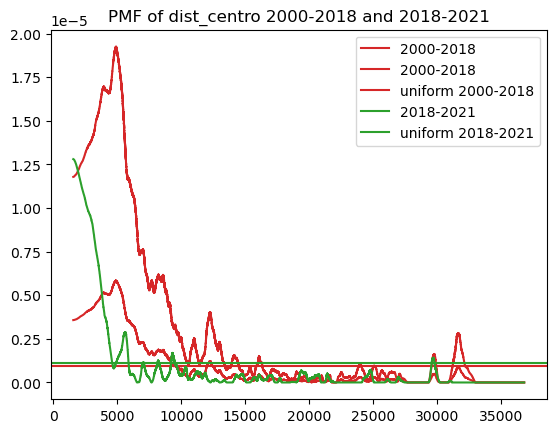

-> 1.3409704499990112
--> 1.5752815890364325
variable: dist_carreteras


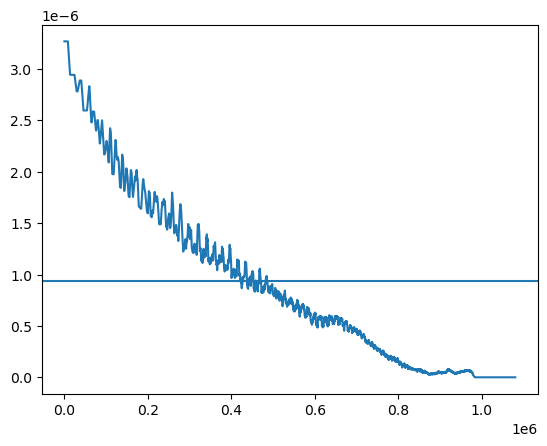

1.0


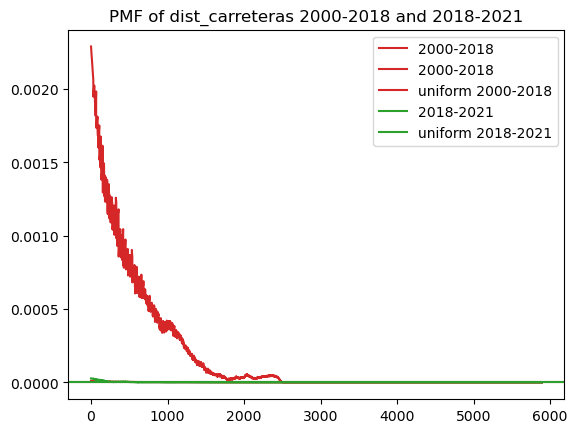

-> 1.485391805738133
--> 1.6955241533542658
variable: costo


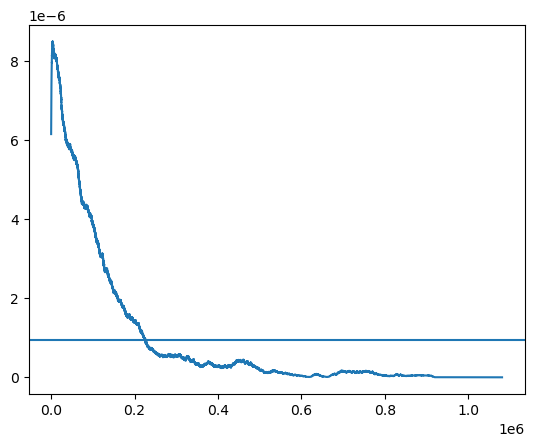

1.0


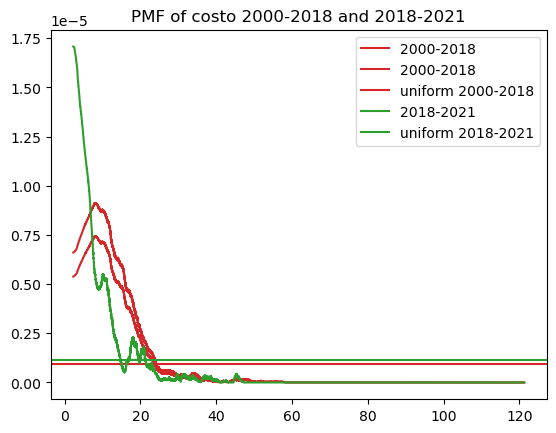

-> 1.6706263419992273
--> 1.7353982278019429


In [53]:
label = dataY.incremento_urbano.to_numpy()
labelv = dataYv.incremento_urbano.to_numpy()

for c in dataX.columns[3:]:
    
    print("variable:", c)
    

    
    T = otoc.TOC(rank = -feature, groundtruth = label)

    X = T.TPplusFP[~T.idiscontinuous]

    Y = T.TP[~T.idiscontinuous]
    
    M = T.generateMassFunction_secant(X, Y, h = 5000)
    plt.plot((M/np.sum(M))[::-1])
    plt.axhline(y = np.mean(label)/np.sum(M))
    plt.show()
    
    

    ix = ~T.idiscontinuous[1:]
    Xinterp = np.linspace(np.min(feature), np.max(feature), len(label))
    Yinterp = np.interp(Xinterp, -T.rank[T.indices][ix][::-1], np.array(M)[1:][ix][::-1])
    plt.plot(-T.rank[T.indices][ix], np.array(M)[1:][ix]/np.sum(np.array(M)[1:][ix]), label = "2000-2018", color = "tab:red")
    plt.plot(Xinterp, Yinterp/np.sum(Yinterp), label = "2000-2018", color = "tab:red")
    
    Y = np.mean(label)/np.sum(M)
    plt.axhline(y = Y, label = "uniform 2000-2018", color = "tab:red")
    
        
        
    plt.title("PMF of" + c + "2000-2018")
    
    
    T = otoc.TOC(rank = -featurev, groundtruth = labelv)
    
    X = T.TPplusFP[~T.idiscontinuous]
    Y = T.TP[~T.idiscontinuous]
    
    M = T.generateMassFunction_secant(X, Y, h = 5000)
    
    ix = ~T.idiscontinuous[1:]
    Xinterpv = np.linspace(np.min(feature), np.max(feature), len(label))
    Yinterpv = np.interp(Xinterpv, -T.rank[T.indices][ix][::-1], np.array(M)[1:][ix][::-1])

   
    plt.title("PMF of " + c + " 2000-2018 and 2018-2021")
    print(np.sum(np.array(M)[1:][ix]/np.sum(np.array(M)[1:][ix])))
    plt.plot(Xinterp, Yinterpv/np.sum(Yinterpv), label = "2018-2021", color = "tab:green")
    plt.axhline(y = np.mean(labelv)/np.sum(M), label = "uniform 2018-2021", color = "tab:green")
    plt.legend()
    plt.show()
    
    Y = np.mean(labelv)/np.sum(M)
    
    print("->",np.sum(np.abs(Yinterp/np.sum(Yinterp)-Y)))
    print("-->", np.sum(np.abs(Yinterpv/np.sum(Yinterpv)-Y)))

    


    

In [50]:
import statsmodels.api as sm 

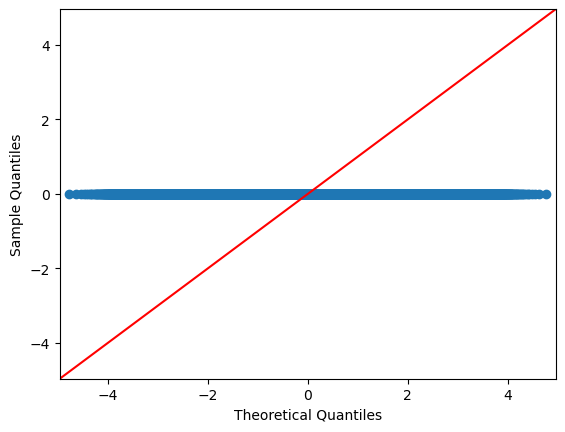

In [63]:
sm.qqplot(  np.abs(Yinterpv/np.sum(Yinterpv) - Yinterp/np.sum(Yinterp)), line = '45')
py.show()

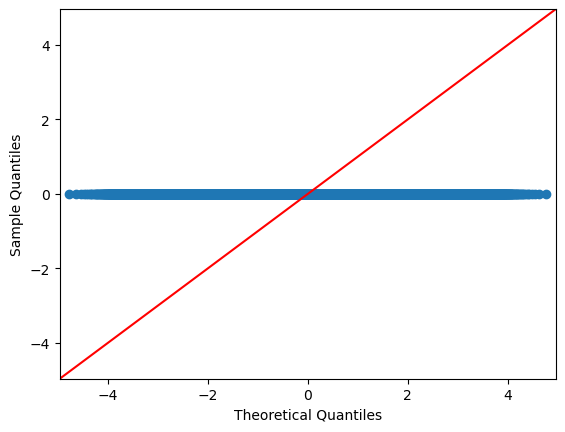

In [69]:
data_points = np.random.normal(0, 1, 1000) 
data_points = np.abs(Yinterpv/np.sum(Yinterpv) - Yinterp/np.sum(Yinterp))
sm.qqplot( data_points, line = '45') 
py.show()

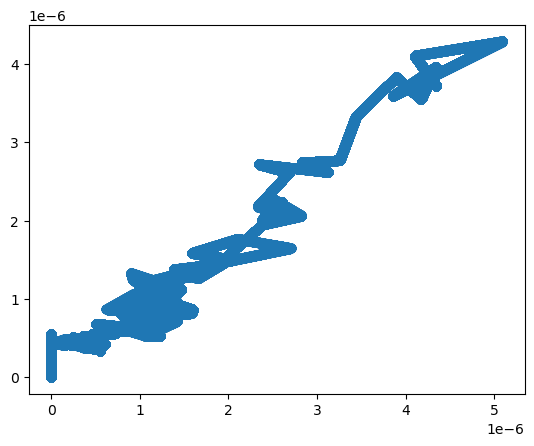

In [71]:
plt.scatter(Yinterpv/np.sum(Yinterpv), Yinterp/np.sum(Yinterp), marker = 'o')

In [132]:
V = np.array([[0.1], [0.5], [0.4]])

V = V/(np.sum(V**2)**(0.5))



In [134]:
V

array([[0.15430335],
       [0.77151675],
       [0.6172134 ]])